In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [33]:
df = pd.read_csv('Desktop/GT/car_data_sample_lexus_audi.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
weird = (df.applymap(type) != df.iloc[0].apply(type)).any(axis=1)
df[weird]

,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,vehicle_type_ss,...,dom_is,dom_180_is,msrp_fs,dom_active_is,is_certified_is,fuel_type_ss,scraped_at_dts,status_date_dts,city_ss,state_ss
0,000097ce-85a2-4f2e-a5f7-e45f59daf8ce,JTHBA1D20G5012409,24000,29560,FP13445,2016,Lexus,IS 200t,Base,Car,...,23,23,25000,23,0,Premium Unleaded,2018-08-31T13:35:49Z,2018-09-23T13:33:26Z,Tempe,AZ
1,0000a6d7-09e0-46ba-87ec-77f243e79baa,JTHBW1GG8E2045939,22849,40147,E2045939,2014,Lexus,ES 300h,Base,Car,...,18,18,22849,18,0,Regular Unleaded,2018-08-27T12:46:42Z,2018-09-23T17:33:14Z,Corpus Christi,TX
2,00012821-9fea-4e9a-821f-a4d906b190c0,WA1DGAFP3EA124234,24900,53012,PA1206,2014,Audi,Q5,3.0T Premium Plus quattro,SUV,...,58,33,24900,33,0,Premium Unleaded,2018-09-23T00:31:06Z,2018-09-23T23:13:24Z,Baton Rouge,LA
3,00012ddd-f68f-4f17-b31c-527dea12d780,WA1FFCFS3GR004949,29983,12206,GR004949,2016,Audi,Q3,Prestige,SUV,...,20,17,29983,17,0,Premium Unleaded,2018-09-08T22:31:58Z,2018-09-24T00:48:09Z,Saint Petersburg,FL
4,00015add-5e56-44c9-8ba2-434e98cceccb,JTHCL5EF7F5023459,46900,40780,LP180571,2015,Lexus,LS 460,Crafted Line,Car,...,7,7,46900,7,0,Premium Unleaded,2018-09-14T09:56:38Z,2018-09-23T12:15:01Z,Chantilly,VA
5,00018380-5cbb-4aec-ab74-7fd8a9b7d5ea,JTHBK1GG2G2215971,32935,25558,P9686,2016,Lexus,ES 350,Base,Car,...,17,17,32935,17,0,Regular Unleaded,2018-09-08T22:47:25Z,2018-09-24T00:42:10Z,Tallahassee,FL
6,0001e934-c632-4fc7-af6f-85d89c439688,2T2BZMCA2HC112029,45220,16583,PL28549,2017,Lexus,RX 350,Base,SUV,...,45,45,45220,45,1,Regular Unleaded,2018-08-03T00:49:30Z,2018-09-23T23:06:24Z,Alton,IL
7,0001f4be-62d6-4493-8e83-48e28382fabe,WAUEFAFLXAN004019,8878,122757,AN004019,2010,Audi,A4,2.0T Premium,Car,...,58,29,8878,29,0,Premium Unleaded,2018-08-26T21:51:27Z,2018-09-23T23:58:56Z,Westmont,IL
8,000296b7-2ec7-4531-9af2-6781a9c071c1,JTHBK1GG6F2199868,28591,34639,N5267,2015,Lexus,ES 350,Crafted Line,Car,...,23,23,28591,23,1,Regular Unleaded,2018-08-31T15:44:28Z,2018-09-24T02:02:10Z,Concord,NC
9,0002b677-a9ca-4be3-a69c-60b4f337fed9,2T2ZZMCAXGC027002,39691,28547,59513R,2016,Lexus,RX 350,Base,SUV,...,17,17,41995,17,1,Regular Unleaded,2018-09-06T22:29:07Z,2018-09-24T01:16:08Z,San Diego,CA


In [35]:
df.head()

,id,vin_ss,price_fs,miles_fs,stock_no_ss,year_is,make_ss,model_ss,trim_ss,vehicle_type_ss,...,dom_is,dom_180_is,msrp_fs,dom_active_is,is_certified_is,fuel_type_ss,scraped_at_dts,status_date_dts,city_ss,state_ss
0,000097ce-85a2-4f2e-a5f7-e45f59daf8ce,JTHBA1D20G5012409,24000,29560,FP13445,2016,Lexus,IS 200t,Base,Car,...,23,23,25000,23,0,Premium Unleaded,2018-08-31T13:35:49Z,2018-09-23T13:33:26Z,Tempe,AZ
1,0000a6d7-09e0-46ba-87ec-77f243e79baa,JTHBW1GG8E2045939,22849,40147,E2045939,2014,Lexus,ES 300h,Base,Car,...,18,18,22849,18,0,Regular Unleaded,2018-08-27T12:46:42Z,2018-09-23T17:33:14Z,Corpus Christi,TX
2,00012821-9fea-4e9a-821f-a4d906b190c0,WA1DGAFP3EA124234,24900,53012,PA1206,2014,Audi,Q5,3.0T Premium Plus quattro,SUV,...,58,33,24900,33,0,Premium Unleaded,2018-09-23T00:31:06Z,2018-09-23T23:13:24Z,Baton Rouge,LA
3,00012ddd-f68f-4f17-b31c-527dea12d780,WA1FFCFS3GR004949,29983,12206,GR004949,2016,Audi,Q3,Prestige,SUV,...,20,17,29983,17,0,Premium Unleaded,2018-09-08T22:31:58Z,2018-09-24T00:48:09Z,Saint Petersburg,FL
4,00015add-5e56-44c9-8ba2-434e98cceccb,JTHCL5EF7F5023459,46900,40780,LP180571,2015,Lexus,LS 460,Crafted Line,Car,...,7,7,46900,7,0,Premium Unleaded,2018-09-14T09:56:38Z,2018-09-23T12:15:01Z,Chantilly,VA


In [36]:
list(df.columns)

['id',
 'vin_ss',
 'price_fs',
 'miles_fs',
 'stock_no_ss',
 'year_is',
 'make_ss',
 'model_ss',
 'trim_ss',
 'vehicle_type_ss',
 'body_type_ss',
 'drivetrain_ss',
 'engine_ss',
 'engine_size_ss',
 'transmission_ss',
 'doors_is',
 'cylinders_is',
 'interior_color_ss',
 'exterior_color_ss',
 'zip_is',
 'dom_is',
 'dom_180_is',
 'msrp_fs',
 'dom_active_is',
 'is_certified_is',
 'fuel_type_ss',
 'scraped_at_dts',
 'status_date_dts',
 'city_ss',
 'state_ss']

In [37]:
print(df.shape)

(172664, 30)


In [38]:
df['price_fs'].describe()

count   172664.000
mean     28738.273
std      12554.014
min       1299.000
25%      21990.000
50%      28912.000
75%      34781.000
max     530000.000
Name: price_fs, dtype: float64

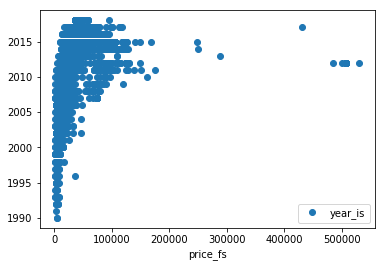

In [39]:
df.plot(x='price_fs', y='year_is', style='o')

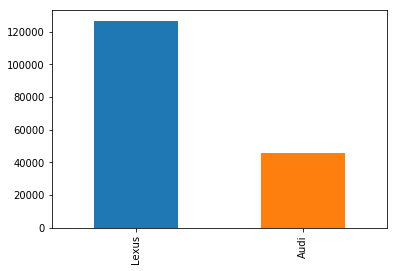

In [40]:
df['make_ss'].value_counts().plot(kind='bar')

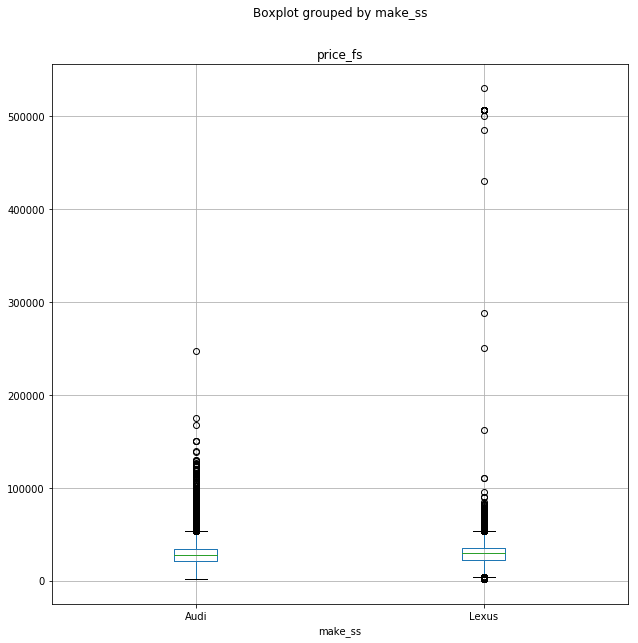

In [41]:
df.boxplot(column="price_fs", by="make_ss", figsize=(10,10))

In [42]:
y = df.price_fs

In [44]:
X = df[['miles_fs', 'year_is', 'make_ss', 'model_ss', 'trim_ss', 'cylinders_is','interior_color_ss','exterior_color_ss',
 'zip_is']]
X = pd.get_dummies(data=X)

MemoryError: 

MemoryError: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
explained_variance_score(y_pred, y_test)